# Grover's Search Algorithm:

In [3]:
import numpy as np
from qiskit import *
from qiskit.visualization import plot_state_city
from qiskit.visualization import plot_histogram
from qiskit import IBMQ
from qiskit.tools.monitor import job_monitor
from qiskit.visualization import plot_gate_map, plot_circuit_layout
import matplotlib.pyplot as plt
import inspect
from math import pi
#from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, execute
from qiskit.tools.visualization import circuit_drawer
from qiskit.quantum_info import state_fidelity
from qiskit import BasicAer

import imageio as im
from IPython.display import Image
import cv2

In [2]:
IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [3]:
IBMQ.providers()
provider = IBMQ.get_provider(group='open')

In [4]:
provider.backends()

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmqx2') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_16_melbourne') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_vigo') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_ourense') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_london') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_burlington') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_essex') from IBMQ(hub='ibm-q', group='open', project='main')>]

In [5]:
backend = provider.get_backend('ibmqx2')

# Steps to Grovers:

1. Initialization
All qubits are set to be in superposition. All states have the amplitude $\frac{1}{\sqrt N}$.

2. Oracle
The oracle function marks the state $x'$ that satisfies the condition $f(x') = 1$ by performing a phase flip. All other states are left unaltered. The operation has the effect of inverting the state’s amplitude and it runs in constant time.

3. Amplification
The amplification stage phase flips the amplitudes around the average amplitude. As the target state’s amplitude was inverted while the other states kept their original amplitudes, the flip causes the target state’s amplitude to increase and the others to decrease.

4. Measurement
The qubits are read and output given.

Each time the oracle and amplification stages are run, the amplitude of the correct answer increases by $O(\frac{1}{\sqrt N})$, where $N$ is the number of qubits in the system.

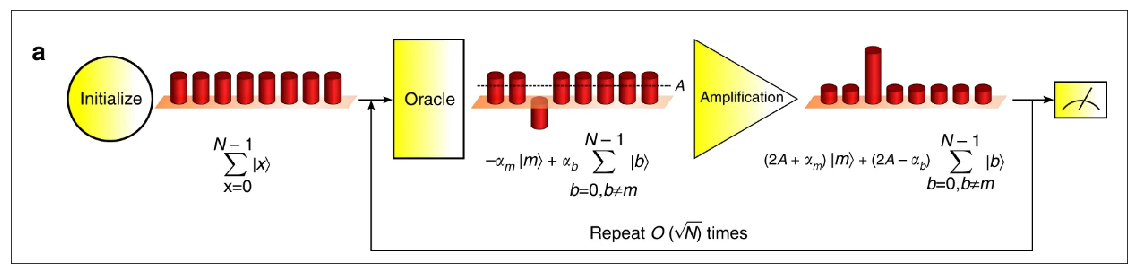

In [4]:
img = cv2.imread('graphic.png')
plt.figure(figsize=[20,10])
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.imshow(img)

In [6]:
#Initialize the quantum circuit to have 4 qubits
N = 3
qc = QuantumCircuit(N)
qc.draw()

In [7]:
np.round(np.sqrt(N))

2.0

In [8]:
#Put each of the 4 qubits in superposition with Hadamard gates
N = 3
qc = QuantumCircuit(N)

for bit in range(0,3):
    qc.h(bit)

for iteration in range(0,2):
    #ORACLE START----------------------------
    qc.x(0)
    qc.x(1)
    qc.x(2)

    qc.h(2)
    qc.ccx(0,1,2)
    qc.h(2)

    qc.x(0)
    qc.x(1)
    qc.x(2)
    #ORACLE END----------------------------

    #AMPLIFICATION START----------------------------
    for bit in range(0,3):
        qc.h(bit)
    for bit in range(0,3):
        qc.x(bit)
    qc.h(2)
    qc.ccx(0,1,2)
    qc.h(2)
    for bit in range(0,3):
        qc.x(bit)
    for bit in range(0,3):
        qc.h(bit)
    #AMPLIFICATION END----------------------------

qc.barrier()
meas = QuantumCircuit(3,3)

#This next line maps the quantum measurment to classical bits
meas.measure(range(3),range(3))
meas.barrier(range(3))
qc_n = qc+meas

qc_n.draw()

In [9]:
backend_sim = Aer.get_backend('qasm_simulator')

job_sim = execute(qc_n,backend_sim,shots=8192)
result_sim = job_sim.result()

counts = result_sim.get_counts(qc_n)
print(counts)

{'101': 62, '010': 54, '001': 60, '000': 7793, '100': 50, '111': 57, '110': 48, '011': 68}


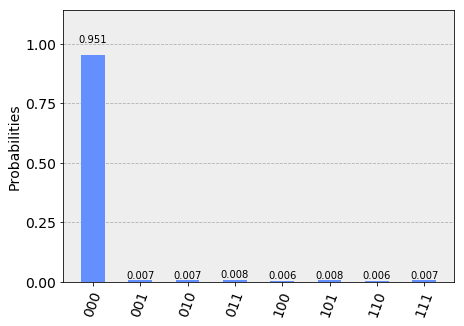

In [10]:
plot_histogram(counts)

In [11]:
qc_n.decompose().draw()

# Gate Experiments:

## Controlled Toffoli - 3 / Double Controlled Z Gate experiment 1

In [62]:
qtoff = QuantumCircuit(3)
for bit in range(0,3):
    qtoff.h(bit)

qtoff.h(2)
qtoff.ccx(0,1,2)
qtoff.h(2)
qtoff.draw()

In [63]:
backend = Aer.get_backend('statevector_simulator')

In [64]:
job = execute(qtoff, backend)
result = job.result()
outputstate = result.get_statevector(qtoff,decimals=3)
print(outputstate)

[ 0.354+0.j  0.354+0.j  0.354+0.j  0.354+0.j  0.354+0.j  0.354+0.j
  0.354+0.j -0.354+0.j]


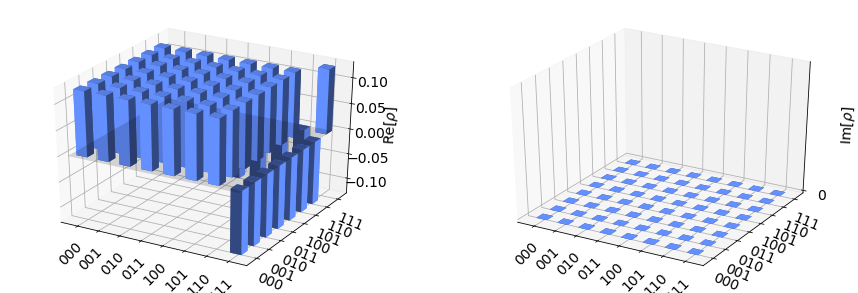

In [65]:
plot_state_city(outputstate)

In [66]:
qtoff.decompose().draw()

## experiment 2

In [67]:
#OR:
qt2 = QuantumCircuit(3)
for bit in range(0,3):
    qt2.h(bit)
qt2.cx(1,2)
qt2.tdg(2)
qt2.ccx(0,1,2)
qt2.t(2)
qt2.cx(1,2)
qt2.tdg(2)
qt2.ccx(0,1,2)
qt2.t(1)
qt2.t(2)
qt2.cx(0,1)
qt2.tdg(1)
qt2.cx(0,1)
qt2.t(0)
qt2.draw()

[ 0.354+0.j  0.354+0.j  0.354+0.j  0.354+0.j  0.354+0.j  0.354+0.j
  0.354+0.j -0.354+0.j]


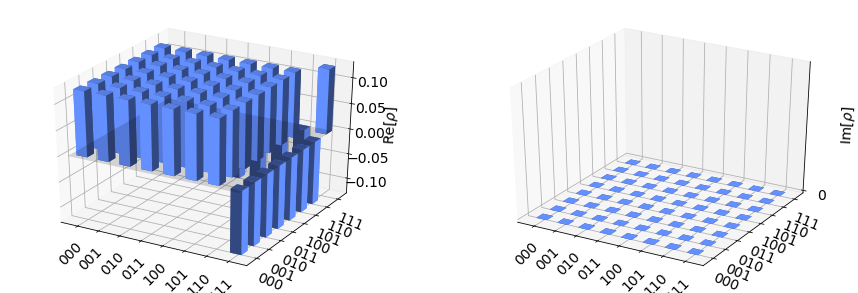

In [68]:
job = execute(qtoff, backend)
result = job.result()
outputstate = result.get_statevector(qtoff,decimals=3)
print(outputstate)
plot_state_city(outputstate)

# Oracle experiments:

library of oracles:

----------------MARK: |000>
#qc2.x(0)
#qc2.x(1)
#qc2.x(2)

qc2.h(0)
qc2.ccx(2,1,0)
qc2.h(0)

#qc2.x(0)
#qc2.x(1)
#qc2.x(2)

----------------MARK: |110>
#qc2.x(0)
qc2.x(1)
qc2.x(2)

qc2.h(0)
qc2.ccx(2,1,0)
qc2.h(0)

#qc2.x(0)
qc2.x(1)
qc2.x(2)

----------------MARK: |010>
qc2.x(0)
#qc2.x(1)
qc2.x(2)

qc2.h(0)
qc2.ccx(2,1,0)
qc2.h(0)

qc2.x(0)
#qc2.x(1)
qc2.x(2)

----------------MARK: |011>
#qc2.x(0)
#qc2.x(1)
qc2.x(2)

qc2.h(0)
qc2.ccx(2,1,0)
qc2.h(0)

#qc2.x(0)
#qc2.x(1)
qc2.x(2)

----------------MARK: |100>
qc2.x(0)
qc2.x(1)
#qc2.x(2)

qc2.h(0)
qc2.ccx(2,1,0)
qc2.h(0)

qc2.x(0)
qc2.x(1)
#qc2.x(2)

----------------MARK: |101>
#qc2.x(0)
qc2.x(1)
#qc2.x(2)

qc2.h(0)
qc2.ccx(2,1,0)
qc2.h(0)

#qc2.x(0)
qc2.x(1)
#qc2.x(2)

----------------MARK: |110>
qc2.x(0)
#qc2.x(1)
#qc2.x(2)

qc2.h(0)
qc2.ccx(2,1,0)
qc2.h(0)

qc2.x(0)
#qc2.x(1)
#qc2.x(2)

----------------MARK: |111>
qc2.x(0)
qc2.x(1)
qc2.x(2)

qc2.h(0)
qc2.ccx(2,1,0)
qc2.h(0)

qc2.x(0)
qc2.x(1)
qc2.x(2)


In [129]:
qc2 = QuantumCircuit(3)
for bit in range(0,3):
    qc2.h(bit)

    
qc2.x(0)
qc2.x(1)
qc2.x(2)

qc2.h(2)
qc2.ccx(0,1,2)
qc2.h(2)

qc2.x(0)
qc2.x(1)
qc2.x(2)


# qc2.h(0)
# qc2.cx(1,0)
# qc2.h(0)

qc2.draw()

[-0.354+0.j  0.354+0.j  0.354+0.j  0.354+0.j  0.354+0.j  0.354+0.j
  0.354+0.j  0.354+0.j]


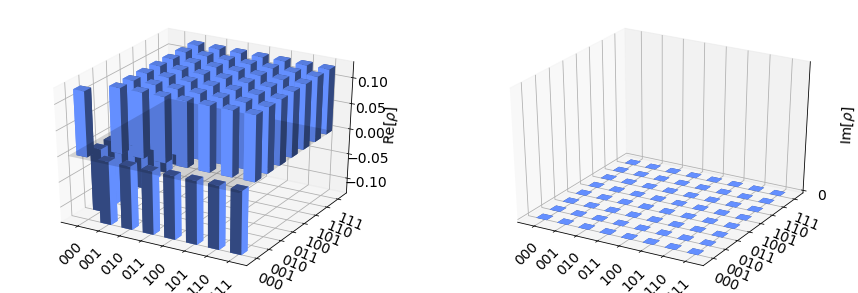

In [130]:
job = execute(qc2, backend)
result = job.result()
outputstate = result.get_statevector(qc2,decimals=3)
print(outputstate)
plot_state_city(outputstate)

# Amplification Experiments:

In [135]:
ampt = QuantumCircuit(3)
for bit in range(0,3):
    ampt.h(bit)

for bit in range(0,3):
    ampt.h(bit)
for bit in range(0,3):
    ampt.x(bit)
ampt.h(2)
ampt.ccx(0,1,2)
ampt.h(2)
for bit in range(0,3):
    ampt.x(bit)
for bit in range(0,3):
    ampt.h(bit)

ampt.draw()

[-0.354+0.j -0.354+0.j -0.354+0.j -0.354+0.j -0.354+0.j -0.354+0.j
 -0.354+0.j -0.354+0.j]


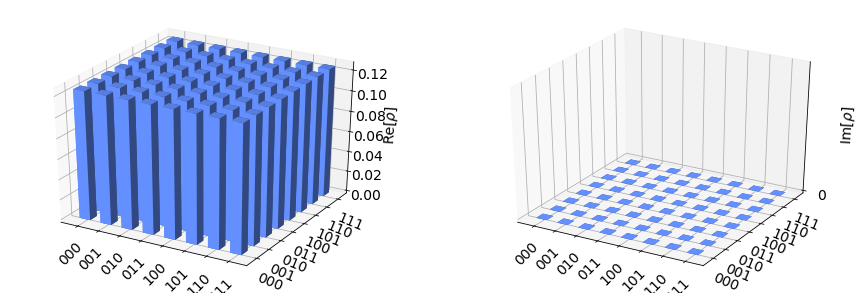

In [136]:
job = execute(ampt, backend)
result = job.result()
outputstate = result.get_statevector(ampt,decimals=3)
print(outputstate)
plot_state_city(outputstate)